# Imports

In [1]:
import os 
path = os.getcwd()
%matplotlib inline
if path[1:5] == "Home":
    %run /Home/siv30/wad005/master/GRB/src/paths/uib.ipynb
    %run /Home/siv30/wad005/master/GRB/src/harvest_matlab_data.ipynb
    %run /Home/siv30/wad005/master/GRB/src/convert_erg.ipynb
    %run /Home/siv30/wad005/master/GRB/src/ASIMXspec.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/paths/mac.ipynb # Mac paths
    %run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
    %run /Users/andreas/phys/master/GRB/src/convert_erg.ipynb
    %run /Users/andreas/phys/master/GRB/src/ASIMXspec.ipynb

/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for


All MAC paths are set!

All MAC paths are set!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!

All MAC paths are set!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!


/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for

convert_erg.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!


/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None


convert_erg.ipynb loaded successfully!
safety_time.ipynb loaded successfully!
LC_calibration loaded successfully!


/Users/andreas/miniforge3/lib/python3.9/site-packages/stingray/utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")


# Notes


# Background extraction

In [2]:
T0 = datetime.fromisoformat('2019-02-06T03:49:28.525')
df = harvest_data(fn='2019_2_6_3_49_28',T0='2019-02-06T03:49:28.525')
tus = df['tus'].to_numpy()
len(tus),type(tus)

dau/det starting from index 1
tus array given in seconds


(46092, numpy.ndarray)

In [6]:
df.tail()

,year,month,day,hour,minute,second,energy_ch,dau,det,datetime,tus
46087,2019,2,6,3,51,40.631199,40,3,1,2019-02-06 03:51:40.631199472,132.106199
46088,2019,2,6,3,51,40.631382,29,3,1,2019-02-06 03:51:40.631381917,132.106382
46089,2019,2,6,3,51,40.631477,1251,4,3,2019-02-06 03:51:40.631476528,132.106477
46090,2019,2,6,3,51,40.631602,25,3,1,2019-02-06 03:51:40.631602500,132.106603
46091,2019,2,6,3,51,40.631609,40,1,1,2019-02-06 03:51:40.631608917,132.106609


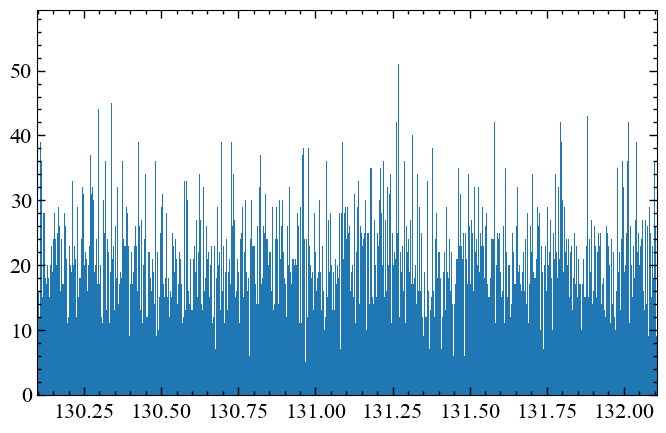

In [11]:
#having a look at the backgorund after the burst
dt = 0.002
i=find_nearest(tus,120)
bins_bg = np.arange(min(tus[i:]),max(tus[i:])+dt,dt)
plt.hist(tus[i:],bins=bins_bg)
plt.show()

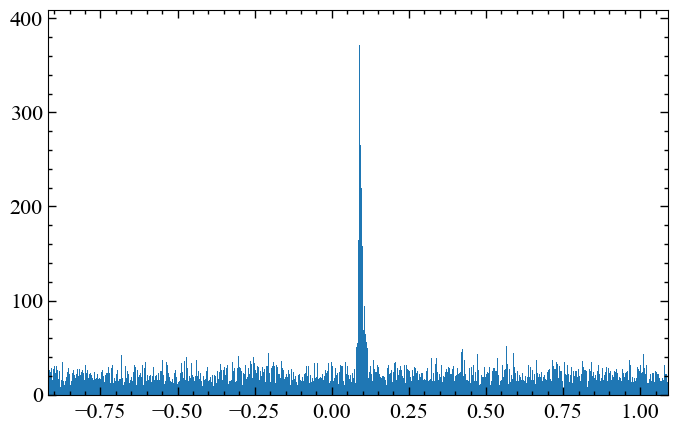

In [12]:
dt = 0.002
bins_burst = np.arange(min(tus[:i]),max(tus[:i])+dt,dt)
plt.hist(tus[:i],bins=bins_burst)
plt.show()

In [14]:
print('triggers in burst: ',len(tus[:i]))

triggers in burst:  24400


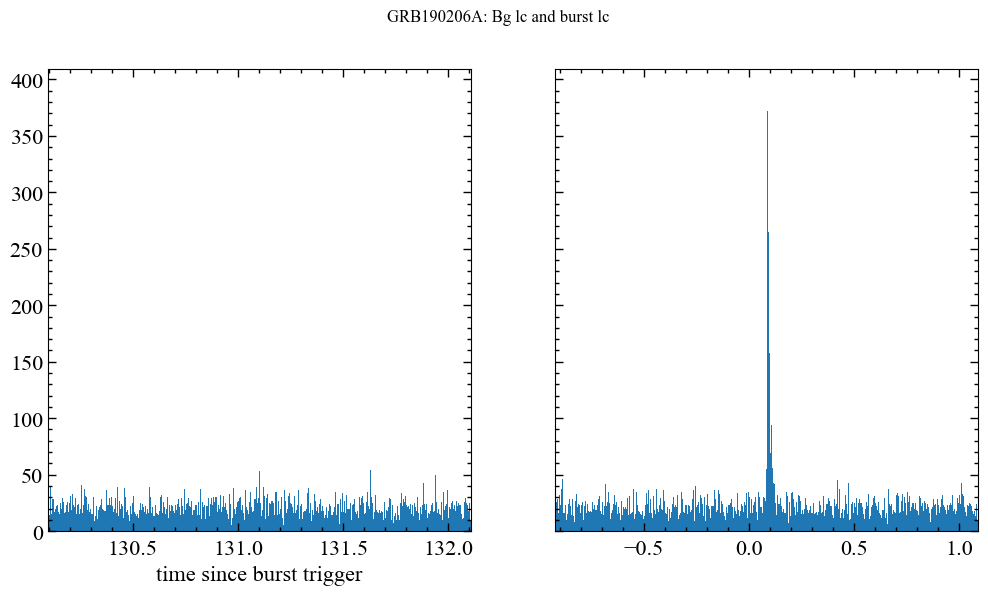

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True,figsize=(12, 6))
fig.suptitle('GRB190206A: Bg lc and burst lc')
ax1.hist(tus[i:],bins=bins_bg)
ax2.hist(tus[:i],bins=bins_burst)
ax1.set_xlabel("time since burst trigger")
plt.show()

In [23]:
print("burst T0: ", T0)
print("bg T0:    ",T0+timedelta(seconds=min(tus[i:])))
print("iss lon,lat position (at T0): ",149.173, 35.715)
print("iss lon,lat position (at bg): ", 157.113,40.886)
print("location: North Pacific Ocean")
print("travelled ~996 km from burst to bg trigger (~130 sec) with 7.66 km/s")

burst T0:  2019-02-06 03:49:28.525000
bg T0:     2019-02-06 03:51:38.622353
iss lon,lat position (at T0):  149.173 35.715
iss lon,lat position (at bg):  157.113 40.886
location: North Pacific Ocean
travelled ~996 km from burst to bg trigger (~130 sec) with 7.66 km/s


# DATAFRAME HANDLING
    TODO: To make a fits file out of the data harvested, one needs to implement the safetytime criteria.
    To implement that, I have to create a column for the adr for the trigger.
    
    tlagg= 0.472s
    
    tus (time trigger) should be kept in MICRO SECONDS!
    

In [50]:
df = harvest_data(fn='2019_2_6_3_49_28',T0='2019-02-06T03:49:28.525')
df = make_adr(df)
keV,cal_abc = convert_erg(df['energy_ch'].to_numpy(),df['dau'].to_numpy(),df['det'].to_numpy(),T0)
df['keV'] = keV
df['tus'] = df['tus'].to_numpy(np.float64)*1e6 #converting to microseconds
print('tus array now in microseconds')

dau/det starting from index 1
tus array given in seconds
tus array now in microseconds


In [51]:
df.sort_index(inplace=True)
i_burst_end = find_nearest(df['tus'].to_numpy()/1e6,120)
df_bg = df.truncate(before=i_burst_end)
df_burst = df.truncate(after=i_burst_end-1)

df_bg.sort_values(by=['adr','tus'],inplace=True)
df_burst.sort_values(by=['adr','tus'],inplace=True)

#DataFrames ready for analysis

In [52]:
df_burst

,year,month,day,hour,minute,second,energy_ch,dau,det,datetime,tus,adr,keV
16,2019,2,6,3,49,27.606794,299,1,1,2019-02-06 03:49:27.606794333,-918205.667,1,2998.481096
17,2019,2,6,3,49,27.606934,1815,1,1,2019-02-06 03:49:27.606934361,-918065.639,1,31537.854200
19,2019,2,6,3,49,27.607,260,1,1,2019-02-06 03:49:27.607000361,-917999.639,1,2564.238950
54,2019,2,6,3,49,27.610282,1057,1,1,2019-02-06 03:49:27.610281528,-914718.472,1,14426.374104
83,2019,2,6,3,49,27.613519,37,1,1,2019-02-06 03:49:27.613518611,-911481.389,1,370.239624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24368,2019,2,6,3,49,29.609735,36,4,3,2019-02-06 03:49:29.609734556,1084734.556,12,448.203700
24370,2019,2,6,3,49,29.609744,88,4,3,2019-02-06 03:49:29.609744222,1084744.222,12,1084.215700
24379,2019,2,6,3,49,29.611267,54,4,3,2019-02-06 03:49:29.611267167,1086267.167,12,666.678700
24390,2019,2,6,3,49,29.613398,57,4,3,2019-02-06 03:49:29.613398333,1088398.333,12,703.264450


In [53]:
df_bg

,year,month,day,hour,minute,second,energy_ch,dau,det,datetime,tus,adr,keV
24400,2019,2,6,3,51,38.622353,93,1,1,2019-02-06 03:51:38.622353472,1.300974e+08,1,874.944104
24406,2019,2,6,3,51,38.622545,94,1,1,2019-02-06 03:51:38.622545194,1.300975e+08,1,884.238606
24411,2019,2,6,3,51,38.622831,25,1,1,2019-02-06 03:51:38.622831194,1.300978e+08,1,266.124600
24417,2019,2,6,3,51,38.623464,104,1,1,2019-02-06 03:51:38.623463722,1.300985e+08,1,977.727686
24427,2019,2,6,3,51,38.625311,1861,1,1,2019-02-06 03:51:38.625310583,1.301003e+08,1,32759.204616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46060,2019,2,6,3,51,40.627709,1921,4,3,2019-02-06 03:51:40.627709472,1.321027e+08,12,33005.452450
46067,2019,2,6,3,51,40.628201,64,4,3,2019-02-06 03:51:40.628201056,1.321032e+08,12,788.823700
46075,2019,2,6,3,51,40.628697,41,4,3,2019-02-06 03:51:40.628696556,1.321037e+08,12,508.712450
46084,2019,2,6,3,51,40.630602,490,4,3,2019-02-06 03:51:40.630601528,1.321056e+08,12,6502.974700


# SAFETY TIME

In [54]:
def get_flag(st_arr,dt_arr):
    flag = []
    i = 0
    while i < len(st_arr):
        if i == 0:
            flag.append(False)
            i += 1

        elif dt_arr[i] >= st_arr[i-1]:
            flag.append(False)
            i+=1

        elif dt_arr[i] <= st_arr[i-1]:
            st,diff = st_arr[i-1], dt_arr[i]
            flags = 0
            i += 1
            #have to take into account that there can be triggers incoming while the st have not been reset
            while diff < st: #problem here
                if i == len(st_arr):
                    flags+=1
                    flag.extend(flags*[True])
                    return flag
                else:
                    diff += dt_arr[i]
                    flags += 1
                    i +=1
            flag.extend(flags*[True])
            i -= 1
        else:
            flag.append(False)
            i += 1
    return np.array(flag)

## flags for bg

In [55]:
st_bg,dt_bg = get_st(df_bg),get_dt(df_bg)
df_bg['st'],df_bg['dt'] = np.array(st_bg),np.array(dt_bg)

st_bg,dt_bg = df_bg["st"].to_numpy(),df_bg["dt"].to_numpy()
flag_bg = get_flag(st_bg,dt_bg)
df_bg['flag'] = flag_bg

flag_label = []
for flag_idx,row in df_bg.iterrows():
    if row["flag"]==True:
        flag_label.append(flag_idx)

print("Removed " + str(len(flag_label)) + " flags from df")
df_bg.drop(labels=flag_label,inplace=True)

Removed 76 flags from df


## flags for burst

In [56]:
st,dt = get_st(df_burst),get_dt(df_burst)
df_burst['st'],df_burst['dt'] = np.array(st),np.array(dt)

st_burst,dt_burst = df_burst["st"].to_numpy(),df_burst["dt"].to_numpy()
flag_burst = get_flag(st_burst,dt_burst)
df_burst['flag'] = flag_burst

flag_label = []
for flag_idx,row in df_burst.iterrows():
    if row["flag"]==True:
        flag_label.append(flag_idx)

print("Removed " + str(len(flag_label)) + " flags from df")
df_burst.drop(labels=flag_label,inplace=True)
print('13 less counts that old dataframe ~0.05% less ...')

Removed 113 flags from df
13 less counts that old dataframe ~0.05% less ...


## plotting LC's

In [58]:
tus_bg = df_bg['tus'].to_numpy(dtype=np.float64)
tus_burst = df_burst['tus'].to_numpy(dtype=np.float64)

tus array OK ...


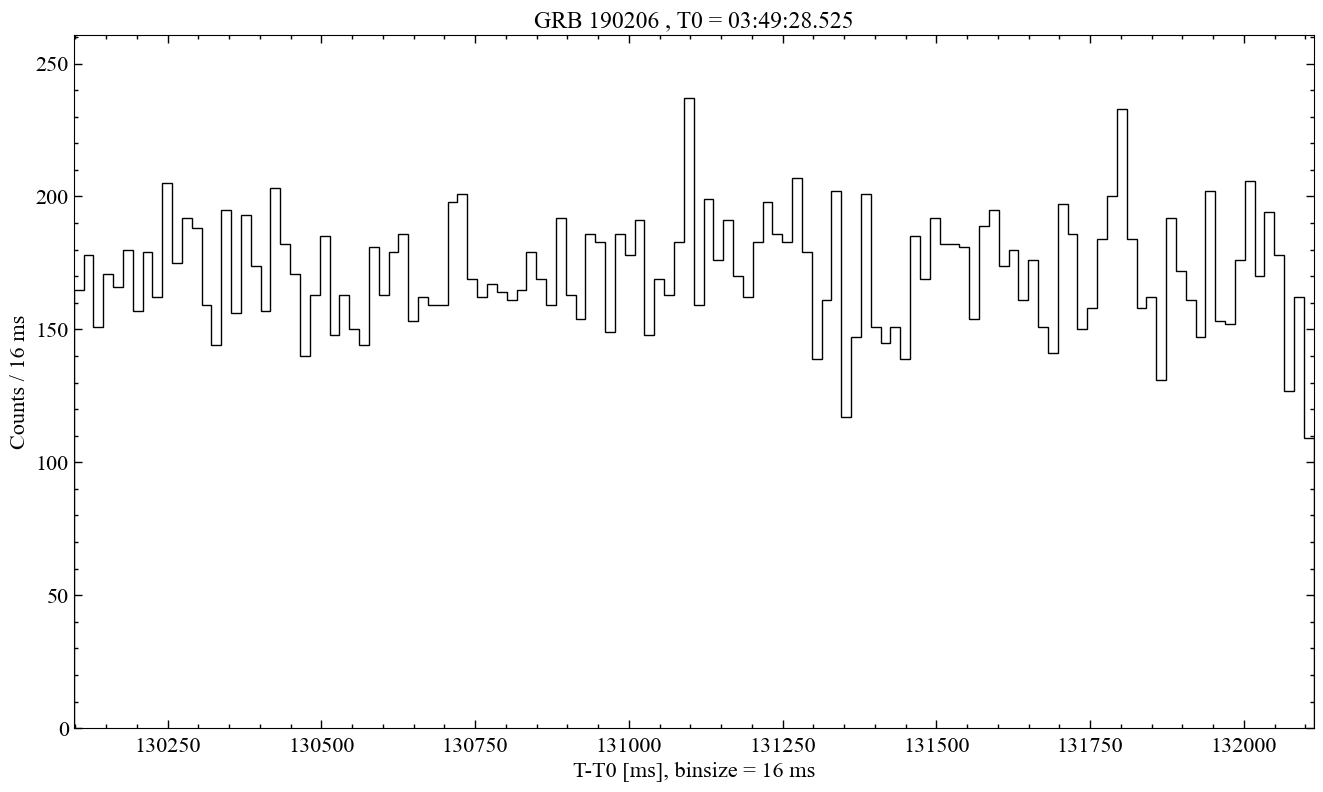

In [59]:
plot_HED(tus_arr=tus_bg,T0=T0,binsize=16)

tus array OK ...


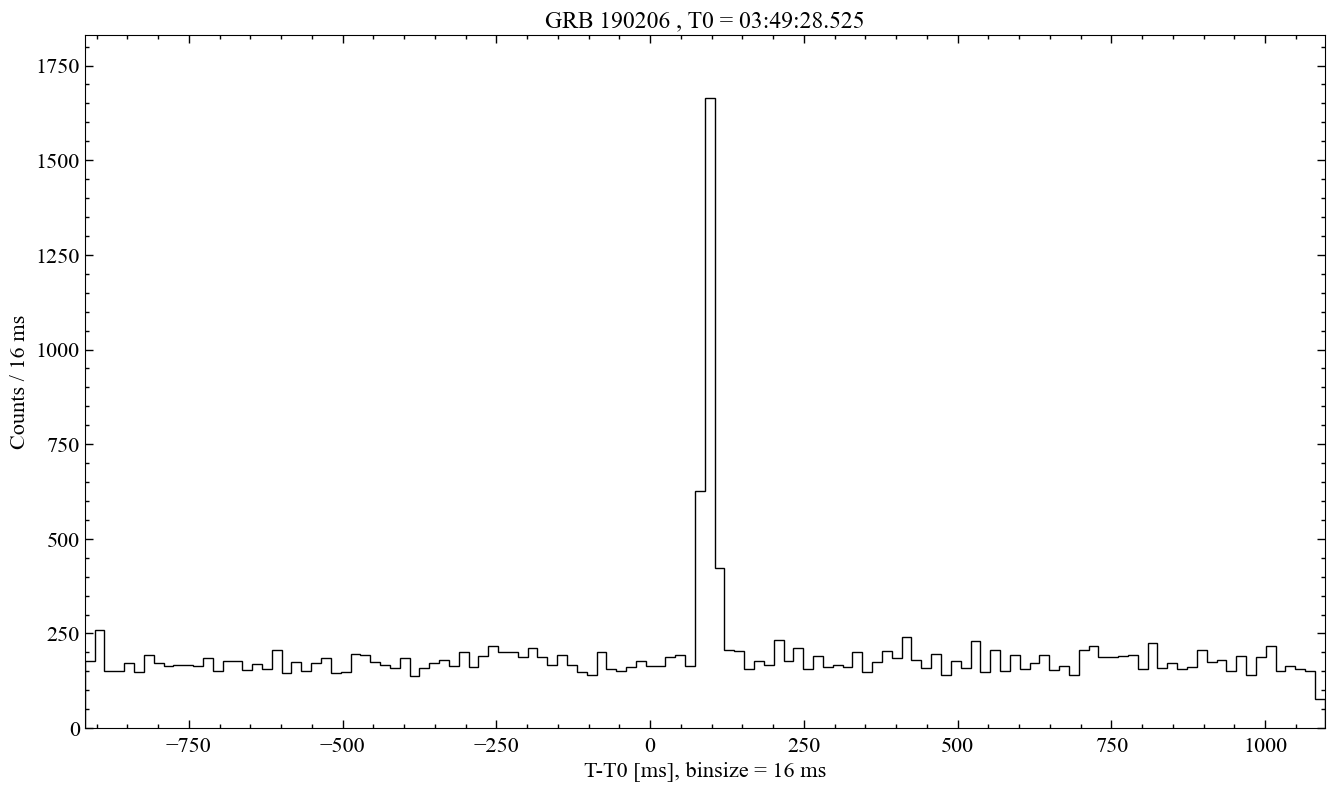

In [60]:
plot_HED(tus_arr=tus_burst,T0=T0,binsize=16)

# Cross Corrolation of burst LC
    Don't need a tlagg_approx. LC is close anyway to T0_KW

In [80]:
#calculating the tlagg approx based on trigger times and ToF
#bringing into KW ref frame...
#T0_ASIM = 13:05:19.816 abs time correction accounted for
#T0_KW = 13:05:15:900
#ToF = 3.4460
#tlagg_approx = 28.525-4.9225-23.926
#print(np.round(tlagg_approx,3))

### KW

In [64]:
#TODO: cut KW lc where binsize stops being 2ms 
#tlagg should come out to be around -0.2955 s

-0.25
0.512


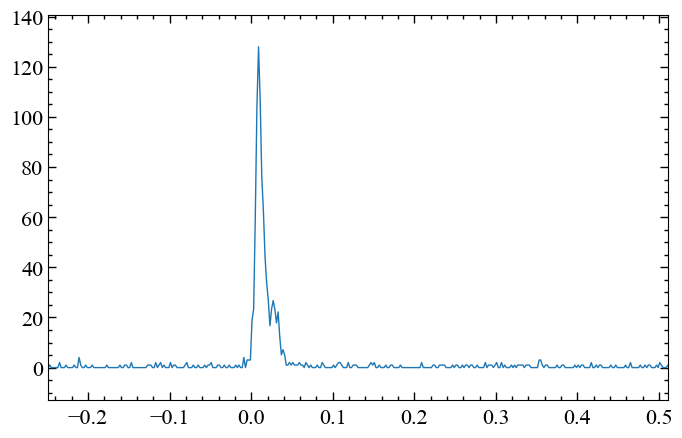

In [81]:
kw_filename = "GRB190206A_2ms.txt"
kw_file = kw_lc_path + kw_filename
binsize=0.002

kw_df = pd.read_csv(kw_file,sep='\s+')
kw_bin_lo,kw_bin_hi,G1,G2,G3= kw_df["Ti"].to_numpy(dtype=np.float16), kw_df["Tf"].to_numpy(dtype=np.float16),kw_df["G1"].to_numpy(dtype=np.float16), kw_df["G2"].to_numpy(dtype=np.float16), kw_df["G3"].to_numpy(dtype=np.float16)

#kw_dt = np.round(np.diff(kw_bin_lo),3)
#i_stop_kw = np.where(kw_dt>2*binsize)[0][0]

#cutting LC at T0+1.5 s, so that both LC's have 2s of data
i_start_kw = find_nearest(kw_bin_lo,-0.25)
print(kw_bin_lo[i_start_kw])
i_stop_kw = find_nearest(kw_bin_lo,0.512)
print(kw_bin_lo[i_stop_kw])


kw_bin_lo, kw_bin_hi, G1, G2, G3 = kw_bin_lo[i_start_kw:i_stop_kw], kw_bin_hi[i_start_kw:i_stop_kw], G1[i_start_kw:i_stop_kw],G2[i_start_kw:i_stop_kw], G3[i_start_kw:i_stop_kw]
kwCounts = G3
kw_lc = LC(time=np.round(kw_bin_lo + binsize/2,3), counts=kwCounts, skip_checks=True,dt=binsize)
kw_lc.plot()

### HED

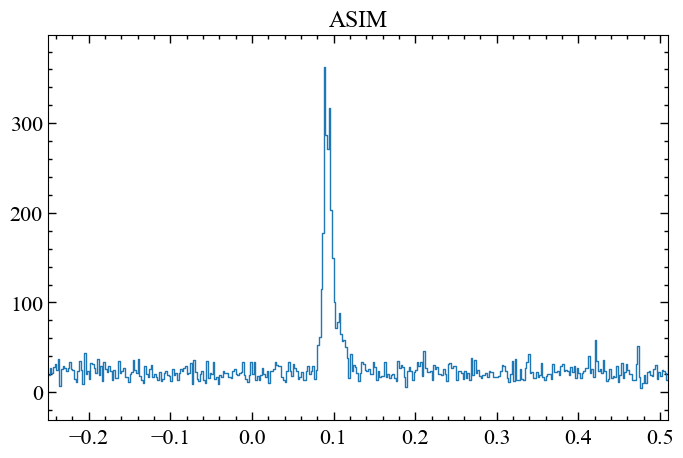

In [82]:
tus_burst = df_burst['tus'].to_numpy()/1e6 #converting back to seconds for CC
hist = np.histogram(tus_burst,bins=np.append(kw_bin_lo,kw_bin_hi[-1])) #using KW bins
asimCounts,asimEdges = hist[0],hist[1]

plt.step(x=asimEdges[:-1],y=asimCounts,where="post")
plt.title("ASIM")
plt.show()

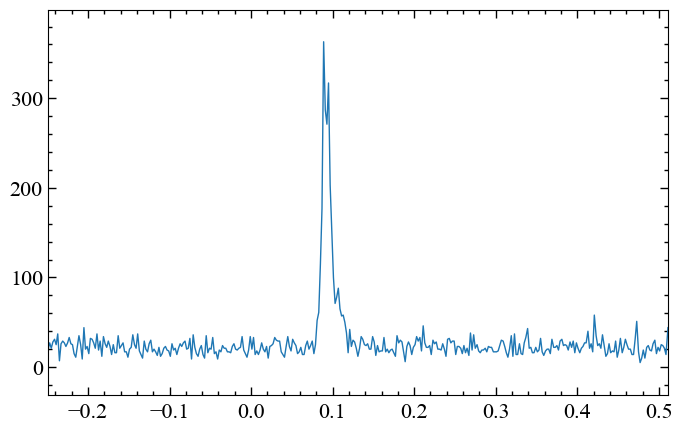

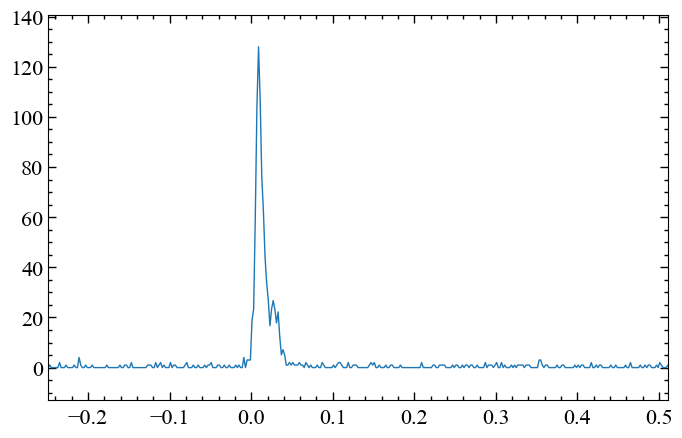

In [83]:
asim_lc = LC(time=np.round(kw_bin_lo + binsize/2,3), counts=asimCounts, skip_checks=True,dt=binsize)
asim_lc.plot()
kw_lc.plot()

Total lagg (s):  -0.082 | CC lagg:  -0.082   tlagg_approx:  -0.32349999999999923


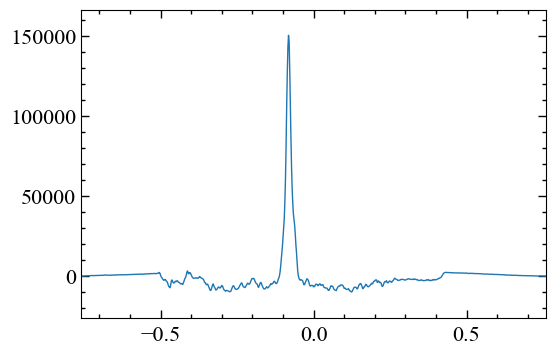

<AxesSubplot: >

In [85]:
CC = CrossCorrelation(kw_lc,asim_lc,mode="full")
CClagg=CC.time_shift
tlagg =CClagg
print("Total lagg (s): ", tlagg, "| CC lagg: ", CClagg, '  tlagg_approx: ', tlagg_approx)
CC.plot()

In [86]:
tlagg = -0.082
df_burst['tus'] = df_burst['tus'].to_numpy() + tlagg*1e6

In [ ]:
'2019-02-06T03:49:28.443'

tus array OK ...


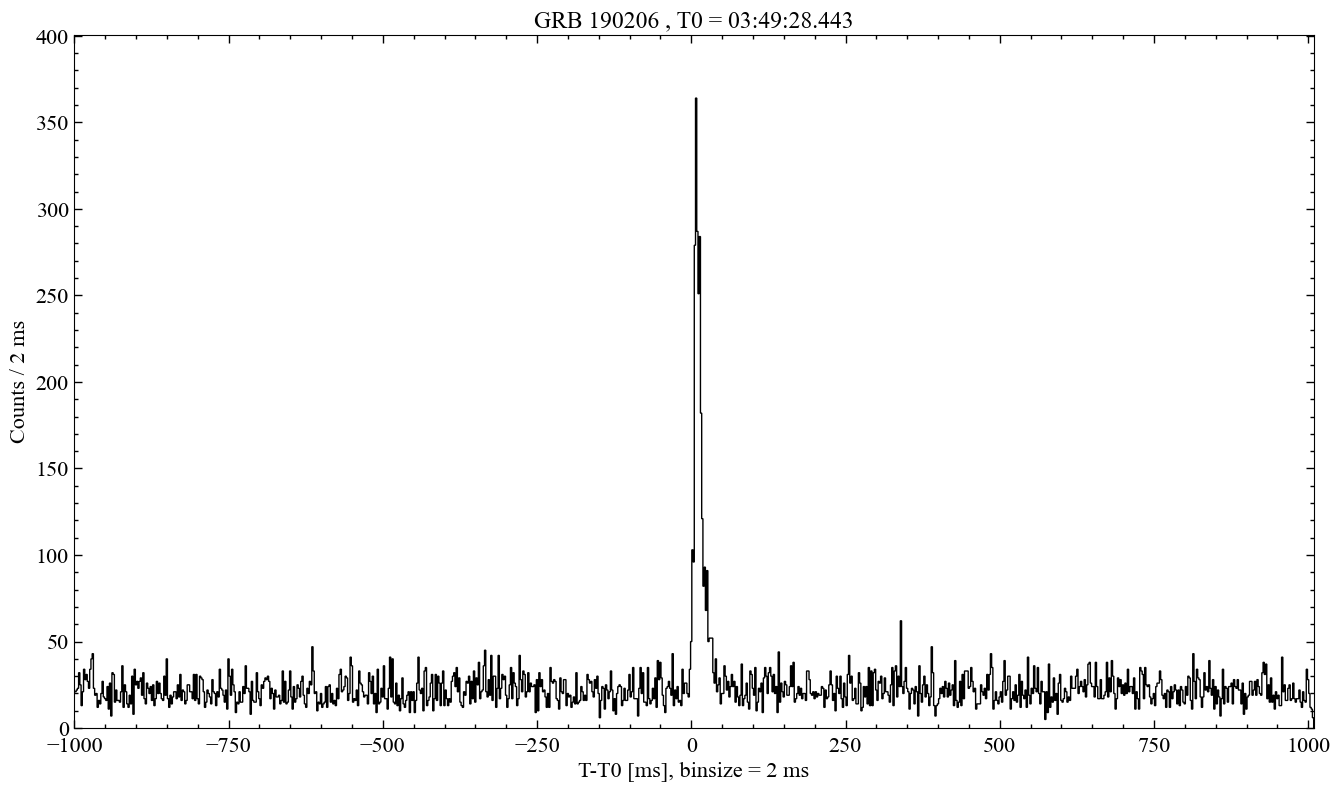

In [88]:
plot_HED(tus_arr=df_burst['tus'].to_numpy(),binsize=2,T0=T0+timedelta(seconds=tlagg))

In [89]:
df_burst.head()

,year,month,day,hour,minute,second,energy_ch,dau,det,datetime,tus,adr,keV,st,dt,flag
16,2019,2,6,3,49,27.606794,299,1,1,2019-02-06 03:49:27.606794333,-1000205.667,1,2998.481096,12.993924,0.000,False
17,2019,2,6,3,49,27.606934,1815,1,1,2019-02-06 03:49:27.606934361,-1000065.639,1,31537.854200,25.615142,140.028,False
19,2019,2,6,3,49,27.607,260,1,1,2019-02-06 03:49:27.607000361,-999999.639,1,2564.238950,11.256956,66.000,False
54,2019,2,6,3,49,27.610282,1057,1,1,2019-02-06 03:49:27.610281528,-996718.472,1,14426.374104,21.000000,3281.167,False
83,2019,2,6,3,49,27.613519,37,1,1,2019-02-06 03:49:27.613518611,-993481.389,1,370.239624,0.000000,3237.083,False


# SPECTRUM

### BACKGROUND

In [90]:
df_keV_bg = keV_hist(df_bg,time_interval='max',keV_interval='max')

Computing whole spectrum (10-1e5 keV)
n triggers in time interval  21615
n triggers are within bounds  21615
keV bins are set for HED
Energies binned!


In [92]:
df_keV_bg.tail()

,bins_keV,counts,poisson_error_counts
36,39810.72,1564,39.547440
37,50118.72,8,2.828427
38,63095.73,0,0.000000
39,79432.82,0,0.000000
40,100000.00,0,0.000000


### BURST

In [94]:
df_burst.shape

(24287, 16)

In [95]:
df_keV_burst,LC = keV_hist(df_burst,time_interval=(0.00,0.064),keV_interval='max',convert_seconds=True,check_LC=True)

Computing whole spectrum (10-1e5 keV)
n triggers in time interval  2902
n triggers are within bounds  2902
keV bins are set for HED
Energies binned!


tus array OK ...


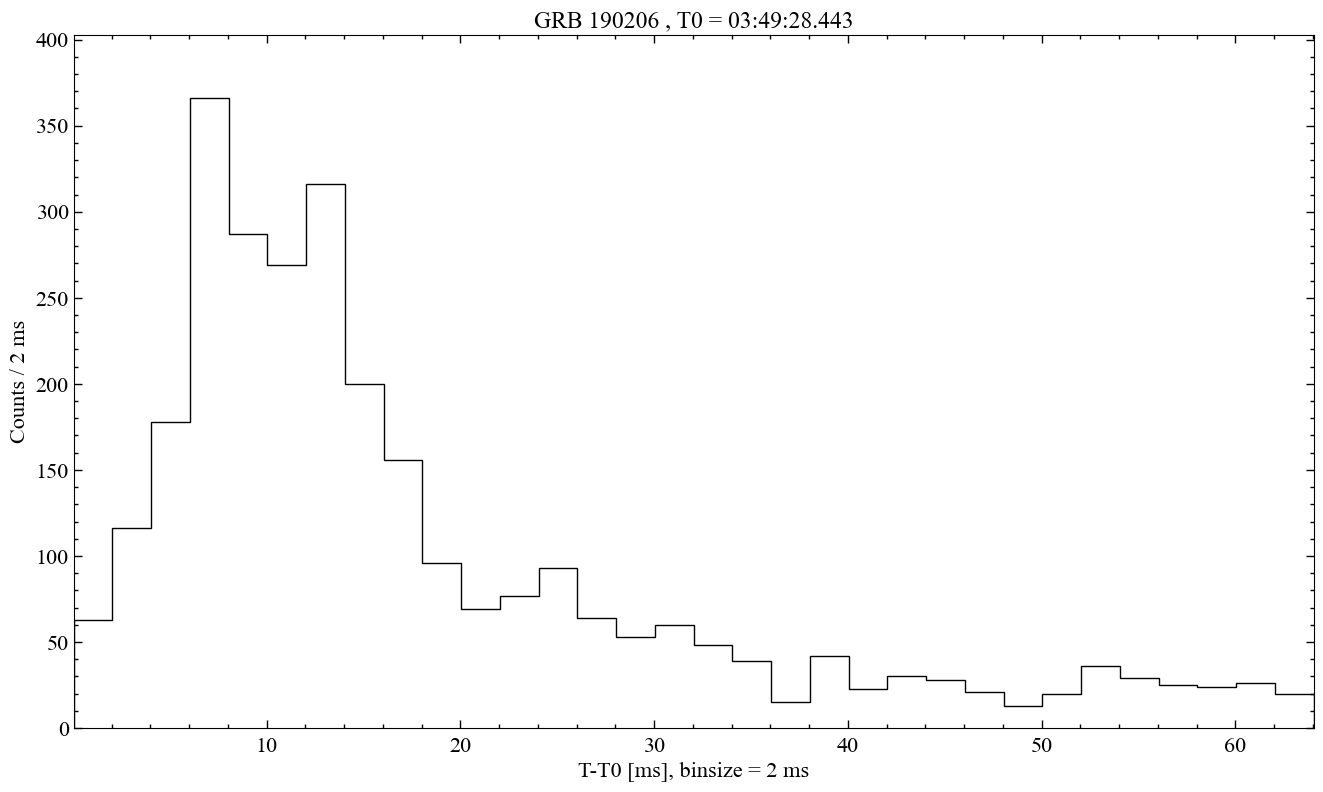

In [99]:
#captures burst...
plot_HED(tus_arr=LC*1e6,binsize=2,T0=T0+timedelta(seconds=tlagg))

In [100]:
df_keV_burst.head(40)

,bins_keV,counts,poisson_error_counts
0,10.00000,0,0.000000
1,12.58925,0,0.000000
2,15.84893,0,0.000000
3,19.95262,0,0.000000
4,25.11886,0,0.000000
5,31.62278,0,0.000000
6,39.81072,0,0.000000
7,50.11872,0,0.000000
8,63.09573,0,0.000000
9,79.43282,0,0.000000


# FITS

In [101]:
%run /Users/andreas/phys/master/GRB/xspec/ASIM/ASIMFits/BAK/ASIMbak.ipynb
%run /Users/andreas/phys/master/GRB/xspec/ASIM/ASIMFits/PHA/ASIMpha.ipynb
%run /Users/andreas/phys/master/GRB/xspec/ASIM/ASIMFits/RSP/ASIMrsp.ipynb
%run /Users/andreas/phys/master/GRB/xspec/ASIM/ASIMFits/RSP/find_closest_DRM.ipynb

## BAK

In [102]:
print(T0+timedelta(seconds=tlagg))
print(min(df_bg['tus'].to_numpy()/1e6),max(df_bg['tus'].to_numpy())/1e6)

2019-02-06 03:49:28.443000
130.097353472 132.106608917


In [116]:
print('T0_bg_start: ',datetime.isoformat(T0+timedelta(seconds=tlagg+130.097353472)))
print('T0_bg_end: ',datetime.isoformat(T0+timedelta(seconds=tlagg+132.106608917)))

T0_bg_start:  2019-02-06T03:51:38.540353
T0_bg_end:  2019-02-06T03:51:40.549609


In [111]:
#EXPOSURE
print(abs(min(df_bg['tus'].to_numpy()/1e6)-max(df_bg['tus'].to_numpy())/1e6))

2.0092554449999795


In [117]:
datetime.isoformat(T0+timedelta(seconds=tlagg))

'2019-02-06T03:49:28.443000'

In [118]:
BAK_dict = {
    'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
    'T0TIME':['2019-02-06T03:51:38.540','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
    'TSTART': [130.097,'[s] Start time of background spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
    'TSTOP': [132.106,'End time of background spectrum accumulation'], #<float> [s]
    'EXPOSURE': [2.009,'[s] Integration time in seconds for the BAK data'], #<float> 
    'OBJECT': ['GRB190206A','Name of the observed object'], #<str> 
    'RA_OBJ': [313.330,'[deg] RA of source'], #<float> 
    'DEC_OBJ':  [-30.510,'[deg] Dec of source'], #<float>
    'FILENAME': ['HED_GRB190206A.bak','Backgorund filename for fits file'] #<str>  ('example.bak')
}


In [130]:
bakCounts = df_keV_bg['counts'][1:].to_numpy(dtype=np.int32)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  133,  399, 1060, 2448, 1904, 1258, 1386, 1199, 1018,
        930,  781,  638,  567,  470,  397,  367,  319,  295,  304,  321,
        564, 3285, 1564,    8,    0,    0,    0], dtype=int32)

In [133]:
df_keV_bg['bins_keV'][1:].to_numpy(dtype=np.float32)

array([1.258925e+01, 1.584893e+01, 1.995262e+01, 2.511886e+01,
       3.162278e+01, 3.981072e+01, 5.011872e+01, 6.309573e+01,
       7.943282e+01, 1.000000e+02, 1.258925e+02, 1.584893e+02,
       1.995262e+02, 2.511886e+02, 3.162278e+02, 3.981072e+02,
       5.011872e+02, 6.309573e+02, 7.943282e+02, 1.000000e+03,
       1.258925e+03, 1.584893e+03, 1.995262e+03, 2.511886e+03,
       3.162278e+03, 3.981072e+03, 5.011872e+03, 6.309573e+03,
       7.943282e+03, 1.000000e+04, 1.258925e+04, 1.584893e+04,
       1.995262e+04, 2.511886e+04, 3.162278e+04, 3.981072e+04,
       5.011872e+04, 6.309573e+04, 7.943282e+04, 1.000000e+05],
      dtype=float32)

In [119]:
generateBAK(BAK_dict=BAK_dict,
            bakCounts=df_keV_bg['counts'][1:].to_numpy(dtype=np.int32),
            stat_err=df_keV_bg['poisson_error_counts'][1:].to_numpy(dtype=np.float32),
            bin_lo=df_keV_bg['bins_keV'][:-1].to_numpy(dtype=np.float32),
            bin_hi=df_keV_bg['bins_keV'][1:].to_numpy(dtype=np.float32)
           )

## PHA

In [120]:
PHA_dict = {
    'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
    'T0TIME':['2019-02-06T03:51:38.540','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
    'TSTART': [0.00,'[s] Start time of spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
    'TSTOP': [0.064,'End time of spectrum accumulation'], #<float> [s]
    'EXPOSURE': [0.064,'[s] Integration time in seconds for the PHA data'], #<float> 
    'OBJECT': ['GRB190206A','Name of the observed object'], #<str> 
    'RA_OBJ': [313.330,'[deg] RA of source'], #<float> 
    'DEC_OBJ':  [-30.510,'[deg] Dec of source'], #<float>
    'BACKFILE': ['HED_GRB190206A.bak','Background FITS file'], #<str> ('example.bak')
    'RESPFILE': ['HED_GRB190206A.rsp','Response FITS file'], #<str> ('example.rsp')
    'FILENAME': ['HED_GRB190206A.pha','PHA filename'] #<str>  ('example.pha')
}


In [140]:
np.array([10,100,1000,10000,100000],dtype=np.int32)

array([    10,    100,   1000,  10000, 100000], dtype=int32)

In [143]:
df_keV_burst['poisson_error_counts'][1:].to_numpy(dtype=np.float32)

array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  5.7445626, 10.440307 ,
       17.549929 , 22.538855 , 20.297783 , 18.05547  , 16.881943 ,
       14.387495 , 11.916375 , 10.198039 ,  8.717798 ,  7.8740077,
        6.3245554,  4.472136 ,  3.1622777,  4.1231055,  3.1622777,
        4.       ,  3.       ,  3.7416575,  4.358899 , 10.862781 ,
        7.5498343,  0.       ,  0.       ,  0.       ,  0.       ],
      dtype=float32)

In [141]:
generatePHA(PHA_dict=PHA_dict,
            counts=df_keV_burst['counts'][1:].to_numpy(dtype=np.int32),
            stat_err=df_keV_burst['poisson_error_counts'][1:].to_numpy(dtype=np.float32),
            bin_lo=df_keV_burst['bins_keV'][:-1].to_numpy(dtype=np.float32),
            bin_hi=df_keV_burst['bins_keV'][1:].to_numpy(dtype=np.float32))

OSError: File HED_GRB190206A.pha already exists. If you mean to replace it then use the argument "overwrite=True".

### RSP
    Used from theta,phi angles

In [122]:
theta,phi=110.887,-36.980

In [123]:
find_DRM_file(dir_path='/Users/andreas/phys/master/HED_DRM/',
             theta=theta,phi=phi)

'HED_drm_mats_105.00_-30.00.txt'

In [127]:
RSP_dict = {
    'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
    'T0TIME':['2019-03-05T13:05:20.292','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
    'TSTART': [0.768,'[s] Start time of spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
    'TSTOP': [1.280,'End time of spectrum accumulation'], #<float> [s]
    'EXPOSURE': [0.512,'[s] Integration time in seconds for the PHA data'], #<float> 
    'OBJECT': ['GRB190305A','Name of the observed object'], #<str> 
    'RA_OBJ': [340.399,'[deg] RA of source'], #<float> 
    'DEC_OBJ':  [-10.588,'[deg] Dec of source'], #<float>
    'FILENAME': ['HED_GRB190206A.rsp','RSP filename'] #<str>  ('example.pha')
}

In [128]:
generateRSP(RSP_dict=RSP_dict, 
            DRM_fname='HED_drm_mats_105.00_-30.00.txt', 
            bin_lo=df_keV_burst['bins_keV'][:-1].to_numpy(dtype=np.float32),
            bin_hi=df_keV_burst['bins_keV'][1:].to_numpy(dtype=np.float32),
            theta=theta,
            phi=phi,
            see_headers=False)